## GrisSearch et Validation Croisee

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split


# Charger les données iris
iris = load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Initialiser le classificateur
clf = tree.DecisionTreeClassifier()

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4 , 6, 8, 10, 15, 20, 30],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser GridSearchCV avec le classificateur, la grille des hyperparamètres et la validation croisée (par exemple, 5-fold)
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Adapter le modèle aux données
grid_search.fit(X, y)

# Afficher les hyperparamètres optimaux
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Afficher la meilleure précision obtenue lors de la validation croisée
print("Meilleure précision lors de la validation croisée:", grid_search.best_score_)

Meilleurs hyperparamètres: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Meilleure précision lors de la validation croisée: 0.9733333333333334


## Arbre de Decision avec Les Hyper parametres propose

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

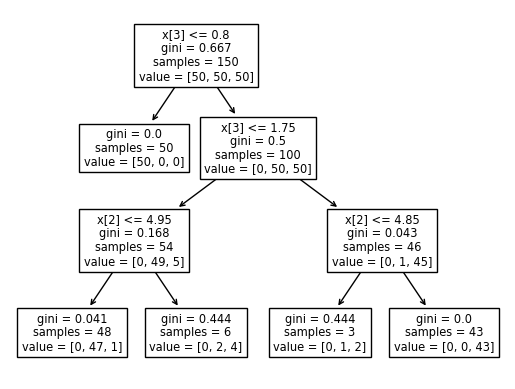

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'] , min_samples_split=best_params['min_samples_split'])
clf = clf.fit(X, y)

tree.plot_tree(clf)